In [1]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Load data into Data Frame

In [2]:
# define file name
file_name = 'Baby_Feedings.csv'

# read csv file and load into data frame
df_raw = pd.read_csv(f'{file_name}')

# view first 10 rows
df_raw.head(10)

,RecordCategory,RecordSubCategory,StartDate,FinishDate,Details
0,Feeding,Bottle,21-Nov-2019 11:14 PM,21-Nov-2019 11:20 PM,"150ml, breast milk"
1,Feeding,Meal,21-Nov-2019 8:30 PM,21-Nov-2019 8:30 PM,1.0 oz sweet potatoes
2,Feeding,Bottle,21-Nov-2019 8:22 PM,21-Nov-2019 8:30 PM,"200ml, breast milk"
3,Feeding,Bottle,21-Nov-2019 5:18 PM,21-Nov-2019 5:25 PM,"210ml, breast milk"
4,Feeding,Meal,21-Nov-2019 2:16 PM,21-Nov-2019 2:16 PM,0.8 oz sweet potatoes
5,Feeding,Meal,21-Nov-2019 2:15 PM,21-Nov-2019 2:15 PM,1.0 oz peaches
6,Feeding,Bottle,21-Nov-2019 2:07 PM,21-Nov-2019 2:15 PM,"180ml, breast milk"
7,Feeding,Meal,21-Nov-2019 9:41 AM,21-Nov-2019 9:41 AM,1.0 oz peaches
8,Feeding,Bottle,21-Nov-2019 9:34 AM,21-Nov-2019 9:41 AM,"210ml, breast milk"
9,Feeding,Bottle,20-Nov-2019 11:20 PM,20-Nov-2019 11:29 PM,"150ml, breast milk"


### Filter down to only bottle feedings

In [3]:
# filter to only Bottle Feedings
df_raw = df_raw[df_raw['RecordCategory'] == 'Feeding']
df_raw = df_raw[df_raw['RecordSubCategory'] == 'Bottle']
df_raw = df_raw.reset_index()

# view first 0 rows
df_raw.head(10)

,index,RecordCategory,RecordSubCategory,StartDate,FinishDate,Details
0,0,Feeding,Bottle,21-Nov-2019 11:14 PM,21-Nov-2019 11:20 PM,"150ml, breast milk"
1,2,Feeding,Bottle,21-Nov-2019 8:22 PM,21-Nov-2019 8:30 PM,"200ml, breast milk"
2,3,Feeding,Bottle,21-Nov-2019 5:18 PM,21-Nov-2019 5:25 PM,"210ml, breast milk"
3,6,Feeding,Bottle,21-Nov-2019 2:07 PM,21-Nov-2019 2:15 PM,"180ml, breast milk"
4,8,Feeding,Bottle,21-Nov-2019 9:34 AM,21-Nov-2019 9:41 AM,"210ml, breast milk"
5,9,Feeding,Bottle,20-Nov-2019 11:20 PM,20-Nov-2019 11:29 PM,"150ml, breast milk"
6,10,Feeding,Bottle,20-Nov-2019 9:06 PM,20-Nov-2019 9:14 PM,"180ml, breast milk"
7,12,Feeding,Bottle,20-Nov-2019 6:14 PM,20-Nov-2019 6:23 PM,"210ml, breast milk"
8,14,Feeding,Bottle,20-Nov-2019 2:35 PM,20-Nov-2019 2:42 PM,"210ml, breast milk"
9,16,Feeding,Bottle,20-Nov-2019 9:55 AM,20-Nov-2019 10:01 AM,"190ml, breast milk"


### Split feed amount into own column

In [4]:
# split Details column to get String amount w/unit
df_raw['Amount'] = df_raw['Details'].str.split(',', expand=True)[0]

# split resulting column to strip unit from numeric value
df_raw['Amount'] = df_raw['Amount'].str.split('ml', expand=True)[0]

# convert amount from String to Integer
df_raw['Amount'] = df_raw['Amount'].astype('int64')

# view first 5 rows
df_raw.head()

,index,RecordCategory,RecordSubCategory,StartDate,FinishDate,Details,Amount
0,0,Feeding,Bottle,21-Nov-2019 11:14 PM,21-Nov-2019 11:20 PM,"150ml, breast milk",150
1,2,Feeding,Bottle,21-Nov-2019 8:22 PM,21-Nov-2019 8:30 PM,"200ml, breast milk",200
2,3,Feeding,Bottle,21-Nov-2019 5:18 PM,21-Nov-2019 5:25 PM,"210ml, breast milk",210
3,6,Feeding,Bottle,21-Nov-2019 2:07 PM,21-Nov-2019 2:15 PM,"180ml, breast milk",180
4,8,Feeding,Bottle,21-Nov-2019 9:34 AM,21-Nov-2019 9:41 AM,"210ml, breast milk",210


### Split feed date into own column

In [5]:
# split out just the date from the DateTime column
df_raw['FeedDate'] = pd.to_datetime(df_raw['StartDate']).dt.date

# view first 5 rows
df_raw.head()

,index,RecordCategory,RecordSubCategory,StartDate,FinishDate,Details,Amount,FeedDate
0,0,Feeding,Bottle,21-Nov-2019 11:14 PM,21-Nov-2019 11:20 PM,"150ml, breast milk",150,2019-11-21
1,2,Feeding,Bottle,21-Nov-2019 8:22 PM,21-Nov-2019 8:30 PM,"200ml, breast milk",200,2019-11-21
2,3,Feeding,Bottle,21-Nov-2019 5:18 PM,21-Nov-2019 5:25 PM,"210ml, breast milk",210,2019-11-21
3,6,Feeding,Bottle,21-Nov-2019 2:07 PM,21-Nov-2019 2:15 PM,"180ml, breast milk",180,2019-11-21
4,8,Feeding,Bottle,21-Nov-2019 9:34 AM,21-Nov-2019 9:41 AM,"210ml, breast milk",210,2019-11-21


### Add calculated columns to the Data Frame
 - Add information columns split from DateTime
 - Add feed number to keep track of feeds
 - Add feed duration in minutes

In [6]:
# add feed start column
df_raw['FeedStartHour'] = pd.to_datetime(df_raw['StartDate']).dt.hour

# add day column
df_raw['Day'] = pd.to_datetime(df_raw['StartDate']).dt.dayofweek

# add week column
df_raw['Week'] = pd.to_datetime(df_raw['StartDate']).dt.week

# add month column
df_raw['Month'] = pd.to_datetime(df_raw['StartDate']).dt.month

# number each feed per day
df_raw['FeedNum'] = df_raw.groupby(['FeedDate']).cumcount()

# calculate feed duration in minutes
df_raw['FeedDuration'] = (pd.to_datetime(df_raw['FinishDate']) - pd.to_datetime(df_raw['StartDate']))
df_raw['FeedDuration'] = df_raw['FeedDuration'].dt.seconds / 60

# view firt 5 rows
df_raw.head()

,index,RecordCategory,RecordSubCategory,StartDate,FinishDate,Details,Amount,FeedDate,FeedStartHour,Day,Week,Month,FeedNum,FeedDuration
0,0,Feeding,Bottle,21-Nov-2019 11:14 PM,21-Nov-2019 11:20 PM,"150ml, breast milk",150,2019-11-21,23,3,47,11,0,6.0
1,2,Feeding,Bottle,21-Nov-2019 8:22 PM,21-Nov-2019 8:30 PM,"200ml, breast milk",200,2019-11-21,20,3,47,11,1,8.0
2,3,Feeding,Bottle,21-Nov-2019 5:18 PM,21-Nov-2019 5:25 PM,"210ml, breast milk",210,2019-11-21,17,3,47,11,2,7.0
3,6,Feeding,Bottle,21-Nov-2019 2:07 PM,21-Nov-2019 2:15 PM,"180ml, breast milk",180,2019-11-21,14,3,47,11,3,8.0
4,8,Feeding,Bottle,21-Nov-2019 9:34 AM,21-Nov-2019 9:41 AM,"210ml, breast milk",210,2019-11-21,9,3,47,11,4,7.0


### Define function converting month number to name

In [7]:
def month_num_to_name(month_num):
    months = ['January',
     'February',
     'March',
     'April',
     'May',
     'June',
     'July',
     'August',
     'September',
     'October',
     'November',
     'December']
    return months[month_num-1]

### Plot raw data

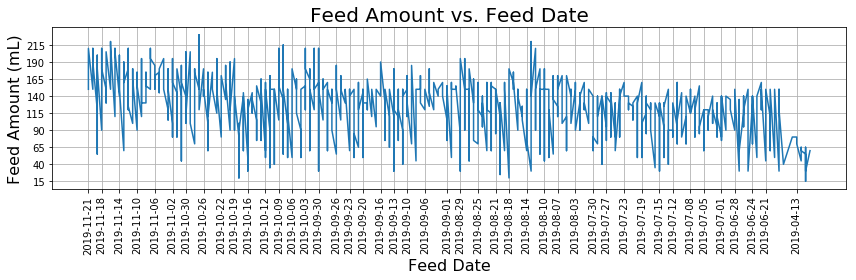

In [8]:
# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot feed amount by feed date
plt.plot(df_raw['FeedDate'].astype(str), df_raw['Amount'])

# enable grid
plt.grid()

# axis labels
plt.xlabel('Feed Date', fontsize=16)
plt.ylabel('Feed Amount (mL)', fontsize=16)

# axis ticks
xticks = df_raw['FeedDate'].astype(str).to_list()[::20] # skip 2 days in between so labels are easier to read
plt.xticks(xticks, rotation='90')
plt.yticks(np.arange(df_raw['Amount'].min(), df_raw['Amount'].max(), 25))

# plot title
plt.title('Feed Amount vs. Feed Date', fontsize=20)

plt.tight_layout()

plt.savefig('feed_amount_vs_feed_date_raw_line')
plt.show()

### Exclude dates prior to regular usage

In [9]:
# convert a String date to DateTime.date object and save to variable
start_date = pd.datetime.strptime('2019-06-18', '%Y-%m-%d').date()

# filter by comparing DateTime.date objects
df_raw = df_raw[df_raw['FeedDate'] >= start_date].reset_index()

# view first 5 rows
df_raw.head()


### code that also works
# filter by casting FeedDate as String and compare to String date
#df_raw = df_raw[df_raw['FeedDate'].astype(str) >= '2019-06-18'].reset_index()
# view first 5 rows
#df_raw.head()

,level_0,index,RecordCategory,RecordSubCategory,StartDate,FinishDate,Details,Amount,FeedDate,FeedStartHour,Day,Week,Month,FeedNum,FeedDuration
0,0,0,Feeding,Bottle,21-Nov-2019 11:14 PM,21-Nov-2019 11:20 PM,"150ml, breast milk",150,2019-11-21,23,3,47,11,0,6.0
1,1,2,Feeding,Bottle,21-Nov-2019 8:22 PM,21-Nov-2019 8:30 PM,"200ml, breast milk",200,2019-11-21,20,3,47,11,1,8.0
2,2,3,Feeding,Bottle,21-Nov-2019 5:18 PM,21-Nov-2019 5:25 PM,"210ml, breast milk",210,2019-11-21,17,3,47,11,2,7.0
3,3,6,Feeding,Bottle,21-Nov-2019 2:07 PM,21-Nov-2019 2:15 PM,"180ml, breast milk",180,2019-11-21,14,3,47,11,3,8.0
4,4,8,Feeding,Bottle,21-Nov-2019 9:34 AM,21-Nov-2019 9:41 AM,"210ml, breast milk",210,2019-11-21,9,3,47,11,4,7.0


### Plot raw data adjusted by start date

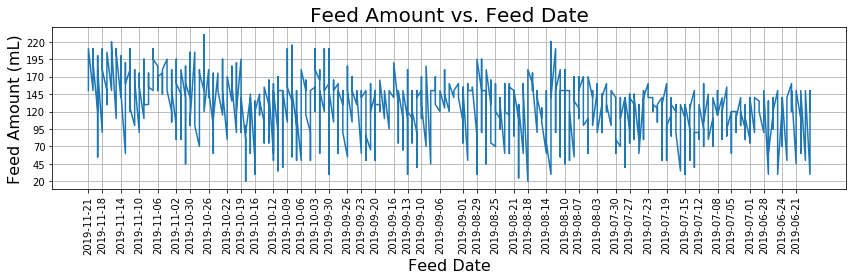

In [10]:
# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot feed amount by feed date
plt.plot(df_raw['FeedDate'].astype(str), df_raw['Amount'])

# enable grid
plt.grid()

# axis labels
plt.xlabel('Feed Date', fontsize=16)
plt.ylabel('Feed Amount (mL)', fontsize=16)

# axis ticks
xticks = df_raw['FeedDate'].astype(str).to_list()[::20] # skip 2 days in between so labels are easier to read
plt.xticks(xticks, rotation='90')
plt.yticks(np.arange(df_raw['Amount'].min(), df_raw['Amount'].max(), 25))

# plot title
plt.title('Feed Amount vs. Feed Date', fontsize=20)

plt.tight_layout()

plt.savefig('feed_amount_vs_feed_date_raw_date_adjust_line')
plt.show()

### Plot feed amount column and calculate amount statistics and IQR values

FEED STATISTICS
---------------
FEED_AMT_MEAN:	 127.18
FEED_AMT_MED:	 130.0
FEED_AMT_MODE:	 [150]
FEED_AMT_STDEV:	 38.93

IQR COMPONENTS
--------------
Q1:	 105.0
Q3:	 150.0
IQR:	 45.0
MAX:	 217.5
MIN:	 37.5


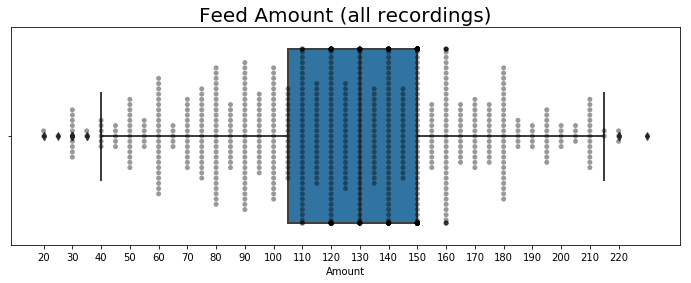

In [11]:
# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# calculate feed amount statistics
feed_amount_mean =  df_raw['Amount'].mean()
feed_amount_median =  df_raw['Amount'].median()
feed_amount_mode =  df_raw['Amount'].mode()
feed_amount_std = df_raw['Amount'].std()

print("FEED STATISTICS")
print("---------------")
print("FEED_AMT_MEAN:\t", round(feed_amount_mean,2))
print("FEED_AMT_MED:\t", feed_amount_median)
print("FEED_AMT_MODE:\t", feed_amount_mode.to_list())
print("FEED_AMT_STDEV:\t", round(feed_amount_std,2))
print("")

# calculate quartiles
q1, q3 = np.percentile(sorted(df_raw['Amount'].to_list()),[25,75])

# calculate iqr
iqr = q3 - q1

# calculate limits
feed_minlim, feed_maxlim = q1 - (1.5* iqr), q3 + (1.5 * iqr)

print("IQR COMPONENTS")
print("--------------")
print('Q1:\t', q1)
print('Q3:\t', q3)
print('IQR:\t', iqr)
print('MAX:\t', feed_maxlim)
print('MIN:\t', feed_minlim)

sns.boxplot(df_raw['Amount'],linewidth=2)
sns.swarmplot(df_raw['Amount'], color='black', alpha=0.4)

plt.xticks(np.arange(df_raw['Amount'].min()//10*10, df_raw['Amount'].max()//10*10, 10))
plt.title('Feed Amount (all recordings)', fontsize=20)

plt.show()

### Aggregate feed amount column
 - aggregate by min, max, mean, sum, count
 - add feed rate column
 - add cumulative / rolling averages

In [12]:
# aggregate by mean
df_mean = df_raw[['FeedDate','Amount','FeedDuration']].groupby(['FeedDate']).aggregate('mean').reset_index()

# aggregate by max
df_max = df_raw[['FeedDate','Amount','FeedDuration']].groupby(['FeedDate']).aggregate('max').reset_index()

# aggregate by min
df_min = df_raw[['FeedDate','Amount','FeedDuration']].groupby(['FeedDate']).aggregate('min').reset_index()

# aggregate by sum
df_sum = df_raw[['FeedDate','Amount','FeedDuration']].groupby(['FeedDate']).aggregate('sum').reset_index()

# aggregate by count
df_count = df_raw[['FeedDate','RecordCategory']].groupby(['FeedDate']).aggregate('count').reset_index()

# add feed rate
df_sum['FeedRate'] = df_sum['Amount'] / df_sum['FeedDuration']

# view first 5 rows
print(df_mean.head())
print(df_max.head())
print(df_min.head())
print(df_sum.head())

     FeedDate      Amount  FeedDuration
0  2019-06-18  114.000000          18.4
1  2019-06-19  118.750000          16.0
2  2019-06-20  118.000000          16.4
3  2019-06-21  100.000000          22.5
4  2019-06-22  141.666667          18.5
     FeedDate  Amount  FeedDuration
0  2019-06-18     150          22.0
1  2019-06-19     150          17.0
2  2019-06-20     150          20.0
3  2019-06-21     150          31.0
4  2019-06-22     160          25.0
     FeedDate  Amount  FeedDuration
0  2019-06-18      30          13.0
1  2019-06-19      50          14.0
2  2019-06-20      60          14.0
3  2019-06-21      45          14.0
4  2019-06-22     120          13.0
     FeedDate  Amount  FeedDuration  FeedRate
0  2019-06-18     570          92.0  6.195652
1  2019-06-19     475          64.0  7.421875
2  2019-06-20     590          82.0  7.195122
3  2019-06-21     600         135.0  4.444444
4  2019-06-22     850         111.0  7.657658


### Add cumulative and rolling statistics
 - daily total feed amount cumulative average
 - daily total feed amount 7-day rolling average
 - daily total feed duration cumulative average
 - daily feed rate cumulative average

In [13]:
# daily total feed amount cumulative avg
df_sum['CumulativeAvg'] = df_sum['Amount'].expanding().mean()

# daily total feed amount 7-day rolling avg
df_sum['SevenDayRollingAvg'] = df_sum['Amount'].rolling(7).mean()

# daily total feed duration cumulative avg
df_sum['CumulativeAvgDur'] = df_sum['FeedDuration'].expanding().mean()

# daily feed rate cumulative avg
df_sum['CumulativeAvgRate'] = df_sum['FeedRate'].expanding().mean()

# view first 10 rows
df_sum.head(10)

,FeedDate,Amount,FeedDuration,FeedRate,CumulativeAvg,SevenDayRollingAvg,CumulativeAvgDur,CumulativeAvgRate
0,2019-06-18,570,92.0,6.195652,570.000000,NaN,92.000000,6.195652
1,2019-06-19,475,64.0,7.421875,522.500000,NaN,78.000000,6.808764
2,2019-06-20,590,82.0,7.195122,545.000000,NaN,79.333333,6.937550
3,2019-06-21,600,135.0,4.444444,558.750000,NaN,93.250000,6.314273
4,2019-06-22,850,111.0,7.657658,617.000000,NaN,96.800000,6.582950
5,2019-06-23,545,97.0,5.618557,605.000000,NaN,96.833333,6.422218
6,2019-06-24,600,121.0,4.958678,604.285714,604.285714,100.285714,6.213141
7,2019-06-25,370,70.0,5.285714,575.000000,575.714286,96.500000,6.097212
8,2019-06-26,705,142.0,4.964789,589.444444,608.571429,101.555556,5.971388
9,2019-06-27,475,102.0,4.656863,578.000000,592.142857,101.600000,5.839935


### Merge aggregate data frames into single data frame

In [14]:
# initialize a new Data Frame
df_agg = pd.DataFrame()

# merge Data Frames
df_agg = df_count.merge(df_mean, on='FeedDate')
df_agg = df_agg.merge(df_max, on='FeedDate')
df_agg = df_agg.merge(df_min, on='FeedDate')
df_agg = df_agg.merge(df_sum, on='FeedDate')

# rename columns
df_agg.columns = ['FeedDate', 'NumFeeds', 'FeedMean', 'DurationMean', 'FeedMax', 'DurationMax', 
                  'FeedMin', 'DurationMin', 'FeedSum', 'DurationSum', 'FeedRate', 'CumulativeAvg', 
                  'SevenDayRollingAvg', 'CumulativeAvgDur', 'CumulativeAvgRate']
df_agg.head(10)

,FeedDate,NumFeeds,FeedMean,DurationMean,FeedMax,DurationMax,FeedMin,DurationMin,FeedSum,DurationSum,FeedRate,CumulativeAvg,SevenDayRollingAvg,CumulativeAvgDur,CumulativeAvgRate
0,2019-06-18,5,114.000000,18.400000,150,22.0,30,13.0,570,92.0,6.195652,570.000000,NaN,92.000000,6.195652
1,2019-06-19,4,118.750000,16.000000,150,17.0,50,14.0,475,64.0,7.421875,522.500000,NaN,78.000000,6.808764
2,2019-06-20,5,118.000000,16.400000,150,20.0,60,14.0,590,82.0,7.195122,545.000000,NaN,79.333333,6.937550
3,2019-06-21,6,100.000000,22.500000,150,31.0,45,14.0,600,135.0,4.444444,558.750000,NaN,93.250000,6.314273
4,2019-06-22,6,141.666667,18.500000,160,25.0,120,13.0,850,111.0,7.657658,617.000000,NaN,96.800000,6.582950
5,2019-06-23,6,90.833333,16.166667,140,24.0,50,6.0,545,97.0,5.618557,605.000000,NaN,96.833333,6.422218
6,2019-06-24,5,120.000000,24.200000,140,35.0,70,16.0,600,121.0,4.958678,604.285714,604.285714,100.285714,6.213141
7,2019-06-25,4,92.500000,17.500000,150,20.0,30,10.0,370,70.0,5.285714,575.000000,575.714286,96.500000,6.097212
8,2019-06-26,6,117.500000,23.666667,140,37.0,95,15.0,705,142.0,4.964789,589.444444,608.571429,101.555556,5.971388
9,2019-06-27,6,79.166667,17.000000,135,28.0,30,14.0,475,102.0,4.656863,578.000000,592.142857,101.600000,5.839935


### Plot aggregated data
Max/Min/Mean Feed Amount

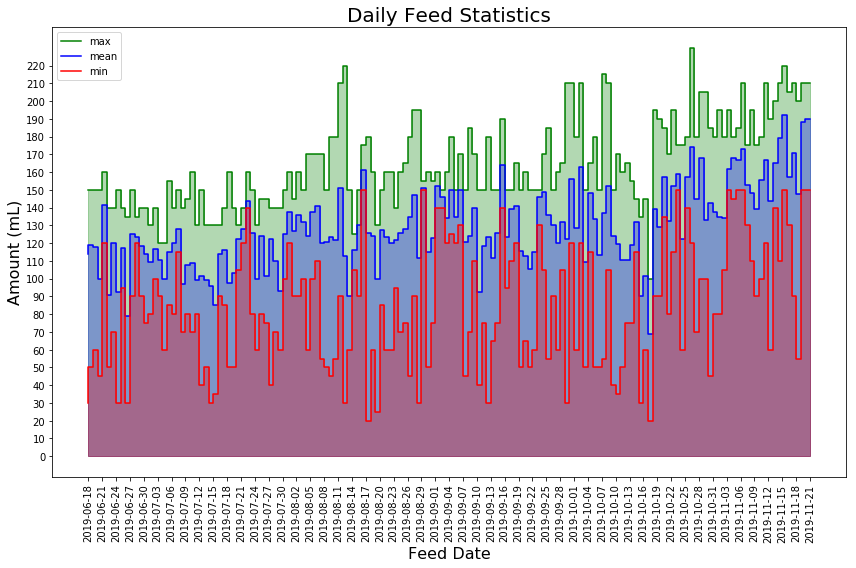

In [15]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot feed statistics by feed date
plt.fill_between(df_agg['FeedDate'].astype(str), df_agg['FeedMax'], color='green', alpha=0.3, step='pre')
plt.step(df_agg['FeedDate'].astype(str), df_agg['FeedMax'], label='max', color='green')
plt.step(df_agg['FeedDate'].astype(str), df_agg['FeedMean'], label='mean', color='blue')
plt.fill_between(df_agg['FeedDate'].astype(str), df_agg['FeedMean'], color='blue', alpha=0.3, step='pre')
plt.fill_between(df_agg['FeedDate'].astype(str), df_agg['FeedMin'], color='red', alpha=0.3, step='pre')
plt.step(df_agg['FeedDate'].astype(str), df_agg['FeedMin'], label='min', color='red')

# enable grid
#plt.grid()

# axis labels
plt.xlabel('Feed Date', fontsize=16)
plt.ylabel('Amount (mL)', fontsize=16)

# axis ticks
xticks = df_agg['FeedDate'].astype(str).to_list()[::3] # skip 2 days in between so labels are easier to read
plt.xticks(xticks, rotation='90')
plt.yticks(np.arange(0, df_max['Amount'].max(), 10))

# plot title
plt.title('Daily Feed Statistics', fontsize=20)

# plot legend
plt.legend(loc=2)

plt.tight_layout()

plt.savefig('feed_amount_stats_vs_feed_date_step')
plt.show()

### Plot aggregated data, continued
Sum Feed Amount
Cumulative/Rolling Averages

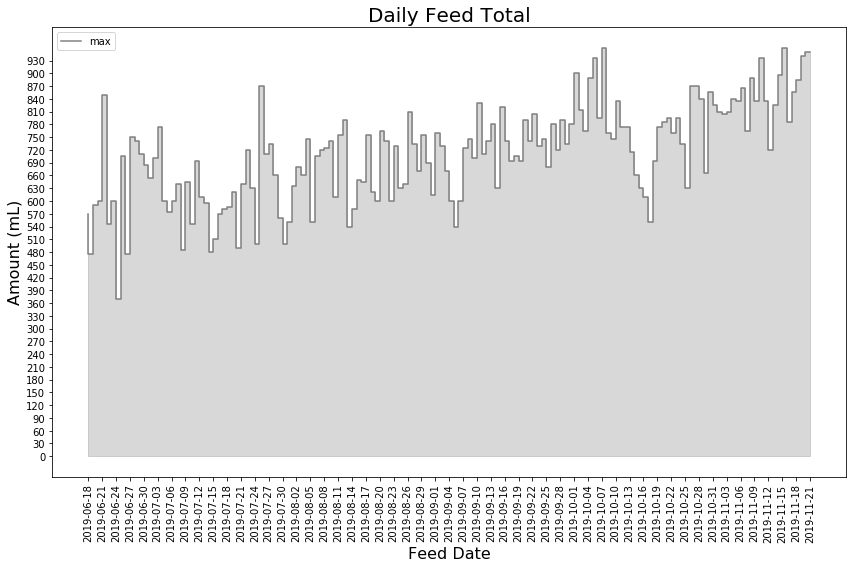

In [16]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot feed statistics by feed date
plt.fill_between(df_agg['FeedDate'].astype(str), df_agg['FeedSum'], color='grey', alpha=0.3, step='pre')
plt.step(df_agg['FeedDate'].astype(str), df_agg['FeedSum'], label='max', color='grey')

# enable grid
#plt.grid()

# axis labels
plt.xlabel('Feed Date', fontsize=16)
plt.ylabel('Amount (mL)', fontsize=16)

# axis ticks
xticks = df_agg['FeedDate'].astype(str).to_list()[::3] # skip 2 days in between so labels are easier to read
plt.xticks(xticks, rotation='90')
plt.yticks(np.arange(0, df_sum['Amount'].max(), 30))

# plot title
plt.title('Daily Feed Total', fontsize=20)

# plot legend
plt.legend(loc=2)

plt.tight_layout()

plt.savefig('feed_amount_total_vs_feed_date_step')
plt.show()

### Plot cumulative feed average, raw and clipped
 - plot unclipped values
 - plot IQR clipped values
 - plot values within mean +/- 1 STD
 - plot values within mean +/- 2 STD

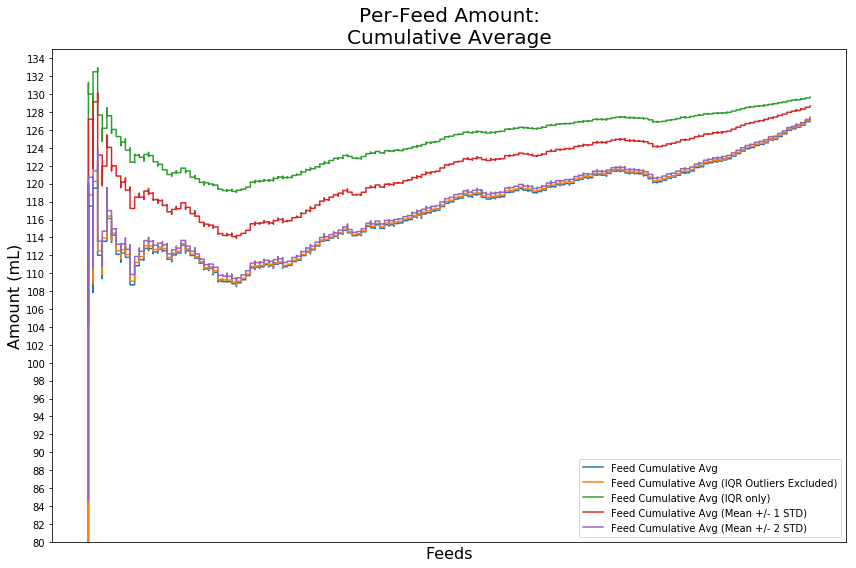

In [17]:
'''
add cumulative feed average and plot
'''
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

df_cum = df_raw.copy()
df_cum.drop(['index'], axis=1)
df_cum = df_cum.sort_values(by=['FeedDate'])

# clipped to IQR max and min limits
df_cum['AmountTrimmedOutliers'] = df_cum['Amount'].clip(lower=feed_minlim, upper=feed_maxlim)

# clipped to IQR values
df_cum['AmountTrimmedQ3Q1'] = df_cum['Amount'].clip(lower=q1, upper=q3)
df_cum['AmountTrimmed1STD'] = df_cum['Amount'].clip(lower=feed_amount_mean-feed_amount_std,                                                     upper=feed_amount_mean+feed_amount_std)
df_cum['AmountTrimmed2STD'] = df_cum['Amount'].clip(lower=feed_amount_mean-(2*feed_amount_std),                                                    upper=feed_amount_mean+(2*feed_amount_std))

# add cumulative averages columns
df_cum['CumulativeFeedAvg'] = df_cum['Amount'].expanding().mean()
df_cum['CumulativeFeedAvgTrimmedOutliers'] = df_cum['AmountTrimmedOutliers'].expanding().mean()
df_cum['CumulativeFeedAvgTrimmedQ3Q1'] = df_cum['AmountTrimmedQ3Q1'].expanding().mean()
df_cum['CumulativeFeedAvgTrimmed1STD'] = df_cum['AmountTrimmed1STD'].expanding().mean()
df_cum['CumulativeFeedAvgTrimmed2STD'] = df_cum['AmountTrimmed2STD'].expanding().mean()

# plot all the cumulative averages
plt.step(df_cum['FeedDate'], df_cum['CumulativeFeedAvg'], label="Feed Cumulative Avg")
plt.step(df_cum['FeedDate'], df_cum['CumulativeFeedAvgTrimmedOutliers'], label="Feed Cumulative Avg (IQR Outliers Excluded)")
plt.step(df_cum['FeedDate'], df_cum['CumulativeFeedAvgTrimmedQ3Q1'], label="Feed Cumulative Avg (IQR only)")
plt.step(df_cum['FeedDate'], df_cum['CumulativeFeedAvgTrimmed1STD'], label="Feed Cumulative Avg (Mean +/- 1 STD)")
plt.step(df_cum['FeedDate'], df_cum['CumulativeFeedAvgTrimmed2STD'], label="Feed Cumulative Avg (Mean +/- 2 STD)")

# title and axis labels
plt.title('Per-Feed Amount:\nCumulative Average', fontsize=20)
plt.xlabel('Feeds', fontsize=16)
plt.ylabel('Amount (mL)', fontsize=16)

# axis limits and ticks
plt.xticks([]) # empty list [] to hide xticks
plt.ylim(80,135)
plt.yticks(np.arange(80,136,2))

plt.tight_layout()
plt.legend()

plt.savefig('feed_amount_vs_feed_record_cum_and_clipped')
plt.show()

Convergence of the differently clipped versions of the cumulative averages indicate decreasing variability in the per-feed amounts.

### Plot cumulative average of feed amount, by month

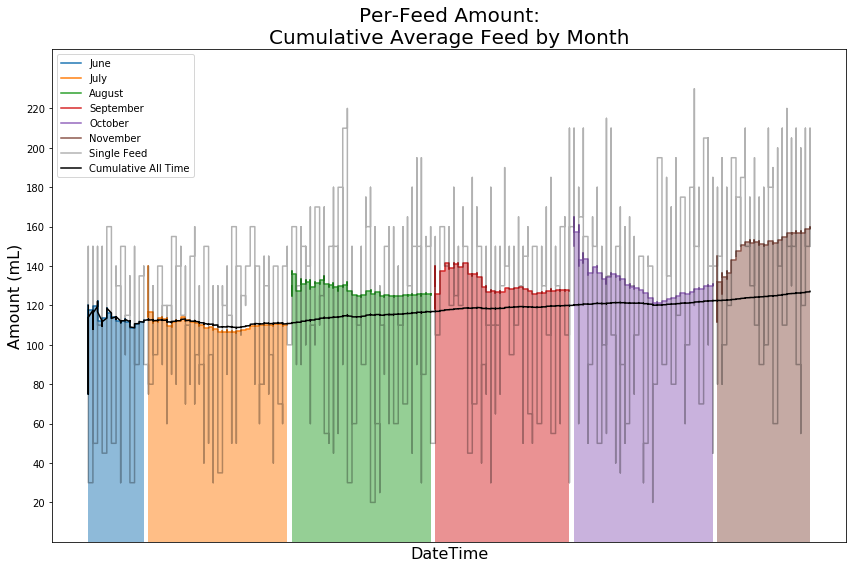

In [18]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# group by month
df_month_gr = df_cum.groupby('Month')

# iterate through the months
for month in range(6,12):
    
    # get data for current month only
    temp_df = df_cum.groupby('Month').get_group(month).copy()
    
    # create cumulative average column
    temp_df['CumulativeFeedAvg'] = temp_df['Amount'].expanding().mean()
    
    # plot per-feed cumulative average
    plt.fill_between(temp_df['FeedDate'].astype(str), temp_df['CumulativeFeedAvg'], alpha=0.5, step='pre')
    plt.step(temp_df['FeedDate'].astype(str), temp_df['CumulativeFeedAvg'], label=f"{month_num_to_name(month)}")

# plot each feed (no accumulation)
plt.step(df_raw['FeedDate'].astype(str), df_raw['Amount'], color='black',label="Single Feed", alpha=0.3)
plt.plot(df_cum['FeedDate'].astype(str), df_cum['CumulativeFeedAvg'], color='black',label="Cumulative All Time", alpha=1)
    
# title and axis labels
plt.title('Per-Feed Amount:\nCumulative Average Feed by Month', fontsize=20)
plt.xlabel('DateTime', fontsize=16)
plt.ylabel('Amount (mL)', fontsize=16)
    
# axis limit and ticks
plt.ylim(df_raw['Amount'].min()-20, df_raw['Amount'].max()+20)
plt.xticks([])
plt.yticks(np.arange(df_raw['Amount'].min(), df_raw['Amount'].max(), 20))
    
plt.legend(loc=0)
plt.tight_layout()

plt.savefig('feed_amount_vs_feed_date_cum_by_month_various')
plt.show()

### Plot cumulative average of daily total feed amount, by month

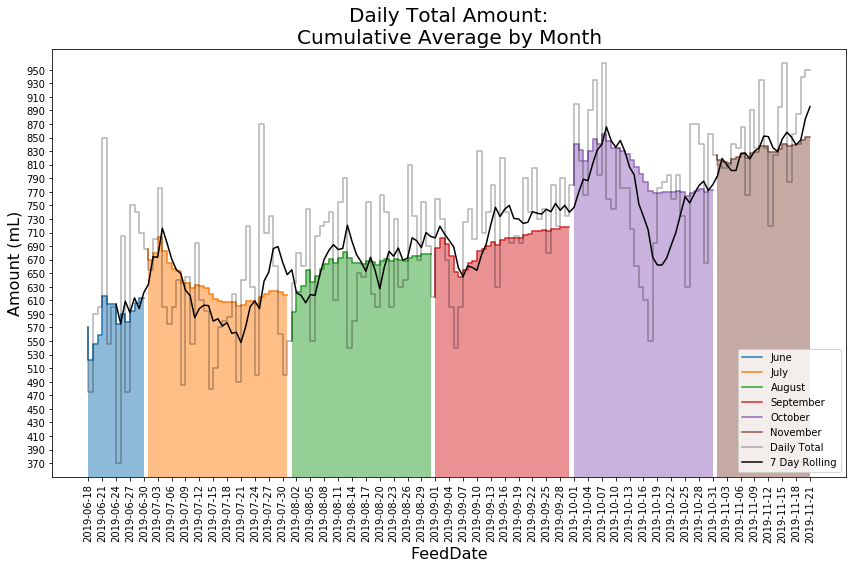

In [19]:
'''
plot daily feed amount cumulative averages
'''
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# iterate through the months
for month in range(6,12):
    
    # get data for current month only
    temp_df = df_month_gr.get_group(month).copy()
    '''
    this needs to be a copy, otherwise adding columns will modify the original df_month_gr,
    which itself is a view of df_cum and thus throw a SettingWithCopyWarning warning
    '''
    
    # aggregate using sum to get daily total amount
    temp_df = temp_df.groupby('FeedDate').aggregate(np.sum)
    temp_df['FeedDate'] = temp_df.index
    
    # create cumulative average column
    temp_df['CumulativeDailyFeedAvg'] = temp_df['Amount'].expanding().mean()
    
    # plot daily cumulative average
    plt.fill_between(temp_df['FeedDate'].astype(str), temp_df['CumulativeDailyFeedAvg'], alpha=0.5, step='pre')
    plt.step(temp_df['FeedDate'].astype(str), temp_df['CumulativeDailyFeedAvg'], label=f"{month_num_to_name(month)}")

# plot raw daily total (no accumulation)
plt.step(df_sum['FeedDate'].astype(str), df_sum['Amount'], color='black',label="Daily Total", alpha=0.3)

# plot all time cumulative avg
#plt.plot(df_sum['FeedDate'].astype(str), df_sum['CumulativeAvg'], color='black',label="Cumulative All Time", alpha=1)

# plot 7-day rolling avg
plt.plot(df_sum['FeedDate'].astype(str), df_sum['SevenDayRollingAvg'], color='black',label="7 Day Rolling", alpha=1)

# title and axis labels
plt.title('Daily Total Amount:\nCumulative Average by Month', fontsize=20)
plt.xlabel('FeedDate', fontsize=16)
plt.ylabel('Amount (mL)', fontsize=16)
    
# axis limit and ticks
plt.ylim(df_sum['Amount'].min()-20, df_sum['Amount'].max()+20)
xticks = df_sum['FeedDate'].astype(str).to_list()[::3]
plt.xticks(xticks, rotation=90)
plt.yticks(np.arange(df_sum['Amount'].min(), df_sum['Amount'].max(), 20))
    
plt.legend(loc=0)
plt.tight_layout()

plt.savefig('feed_amount_total_vs_feed_date_cum_by_month_various')
plt.show()

### Plot cumulative average of daily total feed duration, by month

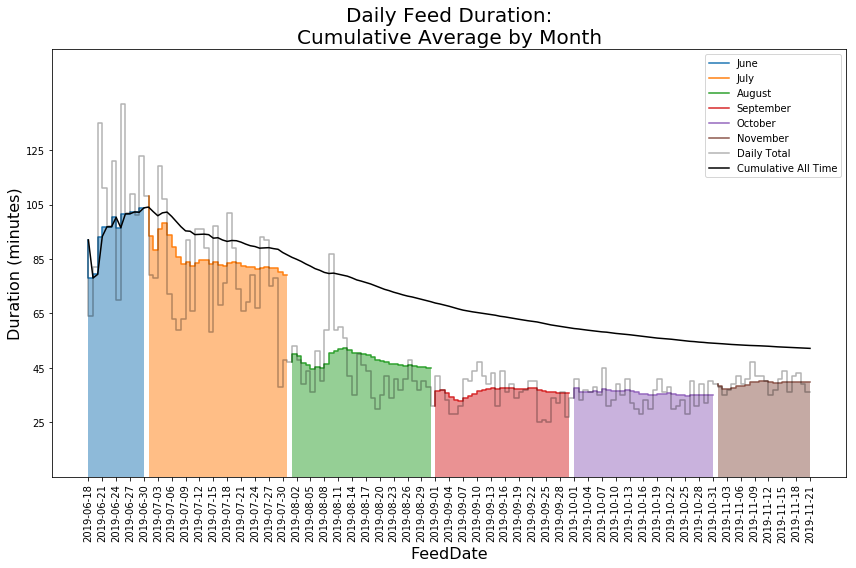

In [20]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# iterate through the months
for month in range(6,12):
    
    # get data for current month only
    temp_df = df_month_gr.get_group(month)
    
    # aggregate using sum to get daily total amount
    temp_df = temp_df.groupby('FeedDate').aggregate(np.sum)
    temp_df['FeedDate'] = temp_df.index
    
    # create cumulative average column
    temp_df['CumulativeDailyFeedDurAvg'] = temp_df['FeedDuration'].expanding().mean()
    
    # plot daily cumulative average
    plt.fill_between(temp_df['FeedDate'].astype(str), temp_df['CumulativeDailyFeedDurAvg'], alpha=0.5, step='pre')
    plt.step(temp_df['FeedDate'].astype(str), temp_df['CumulativeDailyFeedDurAvg'], label=f"{month_num_to_name(month)}")

# plot raw daily total (no accumulation)
plt.step(df_sum['FeedDate'].astype(str), df_sum['FeedDuration'], color='black',label="Daily Total", alpha=0.3)
plt.plot(df_sum['FeedDate'].astype(str), df_sum['CumulativeAvgDur'], color='black',label="Cumulative All Time", alpha=1)
    
# title and axis labels
plt.title('Daily Feed Duration:\nCumulative Average by Month', fontsize=20)
plt.xlabel('FeedDate', fontsize=16)
plt.ylabel('Duration (minutes)', fontsize=16)
    
# axis limit and ticks
plt.ylim(df_sum['FeedDuration'].min()-20, df_sum['FeedDuration'].max()+20)
xticks = df_sum['FeedDate'].astype(str).to_list()[::3]
plt.xticks(xticks, rotation=90)
plt.yticks(np.arange(df_sum['FeedDuration'].min(), df_sum['FeedDuration'].max(), 20))
    
plt.legend(loc=0)
plt.tight_layout()

plt.savefig('feed_duration_total_vs_feed_date_cum_by_month_various')
plt.show()

### Plot cumulative average of daily feed rate, by month

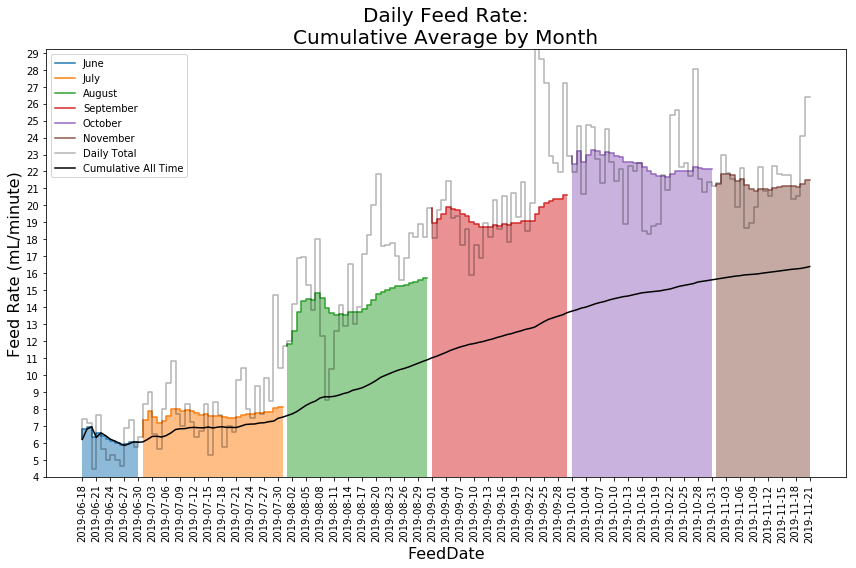

In [21]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# iterate through the months
for month in range(6,12):
    
    # get data for current month only
    temp_df = df_month_gr.get_group(month)
    
    # aggregate using sum to get daily total amount
    temp_df = temp_df.groupby('FeedDate').aggregate(np.sum)
    temp_df['FeedDate'] = temp_df.index
    
    # create feed rate column
    temp_df['FeedRate'] = temp_df['Amount'] / temp_df['FeedDuration']
    
    # create cumulative average column
    temp_df['CumulativeDailyFeedRateAvg'] = temp_df['FeedRate'].expanding().mean()
    
    # plot daily cumulative average
    plt.fill_between(temp_df['FeedDate'].astype(str), temp_df['CumulativeDailyFeedRateAvg'], alpha=0.5, step='pre')
    plt.step(temp_df['FeedDate'].astype(str), temp_df['CumulativeDailyFeedRateAvg'], label=f"{month_num_to_name(month)}")

# plot raw daily total (no accumulation)
plt.step(df_sum['FeedDate'].astype(str), df_sum['FeedRate'], color='black',label="Daily Total", alpha=0.3)
plt.plot(df_sum['FeedDate'].astype(str), df_sum['CumulativeAvgRate'], color='black',label="Cumulative All Time", alpha=1)
    
# title and axis labels
plt.title('Daily Feed Rate:\nCumulative Average by Month', fontsize=20)
plt.xlabel('FeedDate', fontsize=16)
plt.ylabel('Feed Rate (mL/minute)', fontsize=16)
    
# axis limit and ticks
plt.ylim(df_sum['FeedRate'].min(), df_sum['FeedRate'].max())
xticks = df_sum['FeedDate'].astype(str).to_list()[::3]
plt.xticks(xticks, rotation=90)
plt.yticks(np.arange(math.floor(df_sum['FeedRate'].min()), df_sum['FeedRate'].max(), 1))
    
plt.legend(loc=0)
plt.tight_layout()

plt.savefig('feed_rate_total_vs_feed_date_cum_by_month_various')
plt.show()

### Plot feed amount statistics distribution

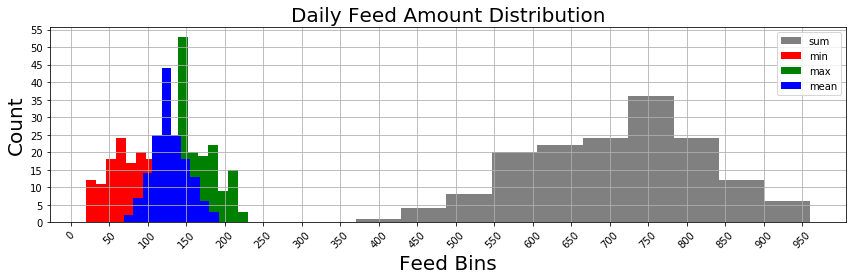

In [22]:
# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot data
plt.hist(df_agg['FeedSum'], label='sum', color='grey')
plt.hist(df_agg['FeedMin'], label='min', color='red')
plt.hist(df_agg['FeedMax'], label='max', color='green')
plt.hist(df_agg['FeedMean'], label='mean', color='blue')

# enable grid
plt.grid()

# axis labels
plt.xlabel('Feed Bins', fontsize=20)
plt.ylabel('Count', fontsize=20)

# axis ticks
plt.xticks(np.arange(0,df_agg['FeedSum'].max(),50), rotation=45)
plt.yticks(np.arange(0,60,5))

# title
plt.title('Daily Feed Amount Distribution', fontsize=20)

# legend
plt.legend()

plt.tight_layout()

plt.savefig('feed_amount_histogram')
plt.show()

### Plot feed duration statistics distribution

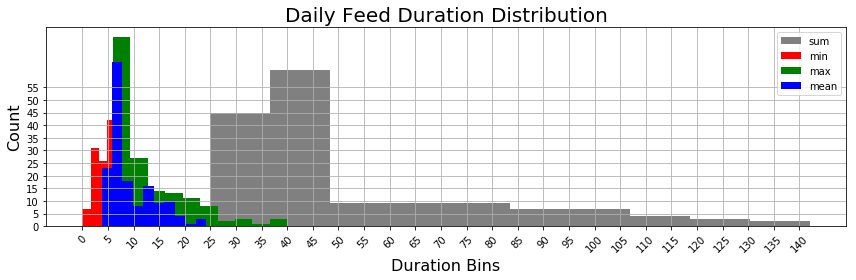

In [23]:
# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot data
plt.hist(df_agg['DurationSum'], label='sum', color='grey')
plt.hist(df_agg['DurationMin'], label='min', color='red')
plt.hist(df_agg['DurationMax'], label='max', color='green')
plt.hist(df_agg['DurationMean'], label='mean', color='blue')

# enable grid
plt.grid()

# axis labels
plt.xlabel('Duration Bins', fontsize=16)
plt.ylabel('Count', fontsize=16)

# axis ticks
plt.xticks(np.arange(0,df_agg['DurationSum'].max(),5), rotation=45)
plt.yticks(np.arange(0,60,5))

# title
plt.title('Daily Feed Duration Distribution', fontsize=20)

# legend
plt.legend()

plt.tight_layout()

plt.savefig('feed_duration_histogram')
plt.show()

### Plot daily total feed vs. number of feeds

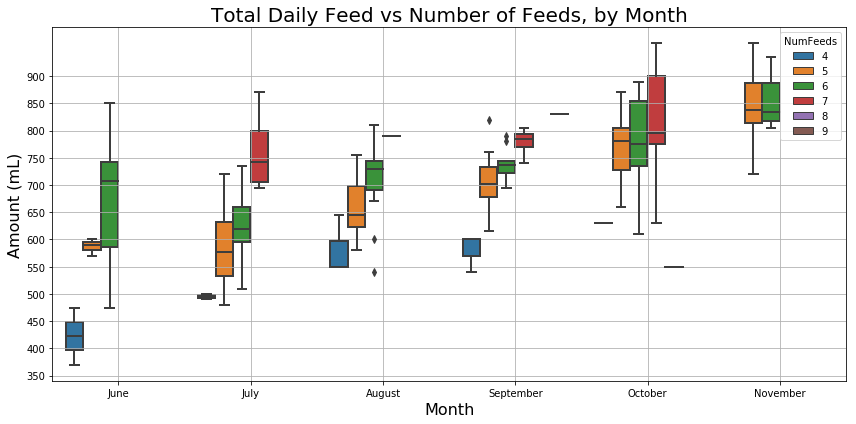

In [24]:
# set figure size
plt.rcParams["figure.figsize"] = (12,6)

# plot data in seaborn boxplot
sns.boxplot(pd.to_datetime(df_agg['FeedDate']).dt.month.apply(lambda x: month_num_to_name(x)), df_agg['FeedSum'], linewidth=2, hue=df_agg['NumFeeds'])
#sns.swarmplot(df_agg['NumFeeds'], df_agg['FeedSum'], color='black', alpha=0.4)

# enable grid
plt.grid()

# axis ticks
plt.yticks(np.arange(df_agg['FeedSum'].min()//25*25, df_agg['FeedSum'].max()//25*25, 50))

# axis labels and chart title
plt.xlabel('Month', fontsize=16)
plt.ylabel('Amount (mL)', fontsize=16)
plt.title('Total Daily Feed vs Number of Feeds, by Month', fontsize=20)

# legend
plt.legend(title='NumFeeds', loc=0)

plt.tight_layout()

plt.savefig('feed_amount_vs_count_boxswarm')
plt.show()

### Plot feeds vs. hour of feed

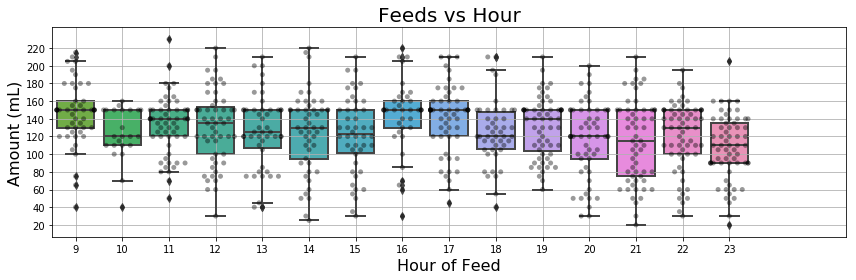

In [25]:
# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot data in seaborn boxplot
sns.boxplot(df_raw['FeedStartHour'], df_raw['Amount'], linewidth=2)
sns.swarmplot(df_raw['FeedStartHour'], df_raw['Amount'], color='black', alpha=0.4)

# enable grid
plt.grid()

# axis ticks
plt.xlim(6.5,23.5)
plt.yticks(np.arange(df_raw['Amount'].min(), df_raw['Amount'].max(), 20))

# axis labels and chart title
plt.xlabel('Hour of Feed', fontsize=16)
plt.ylabel('Amount (mL)', fontsize=16)
plt.title('Feeds vs Hour', fontsize=20)

plt.tight_layout()

plt.savefig('feed_amount_vs_feed_hour_boxswarm')
plt.show()

### Plot feeds vs. feed number of day

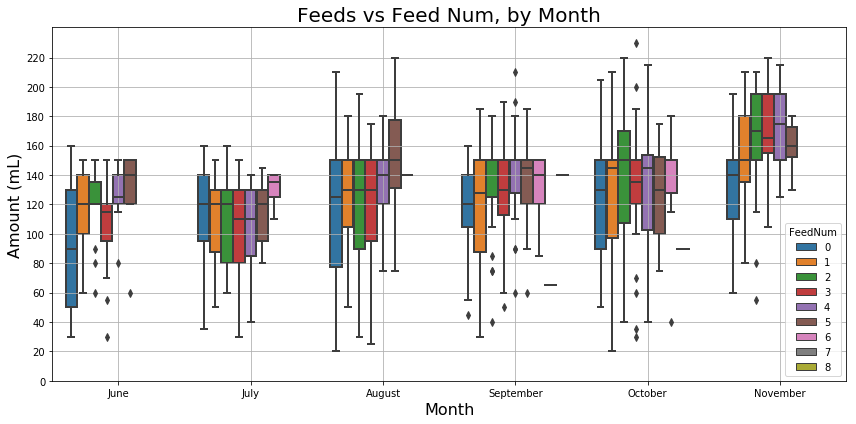

In [26]:
# set figure size
plt.rcParams["figure.figsize"] = (12,6)

# plot data in seaborn boxplot
sns.boxplot(df_raw['Month'].iloc[::-1].apply(lambda x: month_num_to_name(x)), df_raw['Amount'], linewidth=2, hue=df_raw['FeedNum'])
#sns.swarmplot(df_raw['FeedNum'], df_raw['Amount'], color='black', alpha=0.4)

# enable grid
plt.grid()

# axis ticks
plt.yticks(np.arange(df_raw['FeedNum'].min(), df_raw['Amount'].max(), 20))

# axis labels and chart title
plt.xlabel('Month', fontsize=16)
plt.ylabel('Amount (mL)', fontsize=16)
plt.title('Feeds vs Feed Num, by Month', fontsize=20)

# legend
plt.legend(title='FeedNum', loc=0)

plt.tight_layout()

plt.savefig('feed_amount_vs_feed_num_boxswarm')
plt.show()

### Plot total daily feed vs. day of week

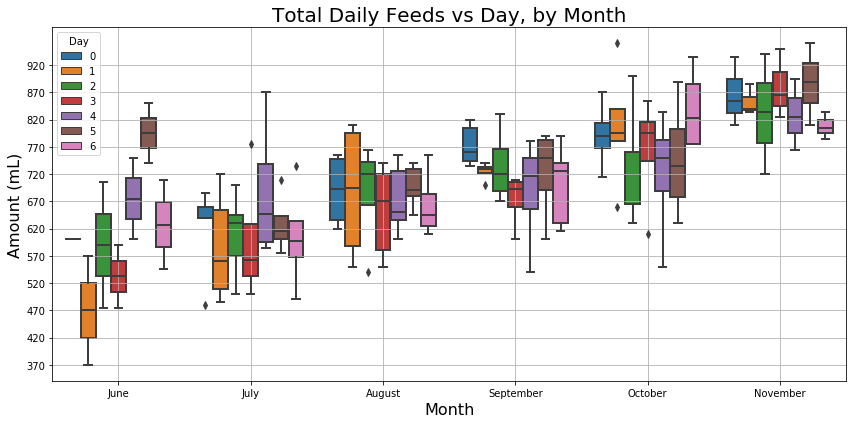

In [27]:
# set figure size
plt.rcParams["figure.figsize"] = (12,6)

# plot data in seaborn boxplot
sns.boxplot(pd.to_datetime(df_agg['FeedDate']).dt.month.apply(lambda x: month_num_to_name(x)), df_agg['FeedSum'], linewidth=2, hue=pd.to_datetime(df_agg['FeedDate']).dt.dayofweek)
#sns.swarmplot(pd.to_datetime(df_agg['FeedDate']).dt.dayofweek, df_agg['FeedSum'], color='black', alpha=0.4)

# enable grid
plt.grid()

# axis ticks
plt.yticks(np.arange(df_sum['Amount'].min(), df_sum['Amount'].max(), 50))

# axis labels and chart title
plt.xlabel('Month', fontsize=16)
plt.ylabel('Amount (mL)', fontsize=16)
plt.title('Total Daily Feeds vs Day, by Month', fontsize=20)

# legend
plt.legend(title='Day', loc=0)

plt.tight_layout()

plt.savefig('feed_daily_amount_vs_day_boxswarm')
plt.show()

### Pivot per-feed amount by feed number

In [28]:
# pivot by feednum
df_pvt = df_raw.pivot(values='Amount', index='FeedDate', columns='FeedNum')
df_pvt['Total'] = df_pvt.sum(axis=1)

df_pvt.head(10)

FeedNum,0,1,2,3,4,5,6,7,8,Total
FeedDate,,,,,,,,,,
2019-06-18,30.0,120.0,150.0,150.0,120.0,NaN,NaN,NaN,NaN,570.0
2019-06-19,50.0,140.0,135.0,150.0,NaN,NaN,NaN,NaN,NaN,475.0
2019-06-20,110.0,60.0,145.0,125.0,150.0,NaN,NaN,NaN,NaN,590.0
2019-06-21,45.0,100.0,80.0,105.0,120.0,150.0,NaN,NaN,NaN,600.0
2019-06-22,160.0,150.0,120.0,120.0,150.0,150.0,NaN,NaN,NaN,850.0
2019-06-23,50.0,100.0,120.0,55.0,80.0,140.0,NaN,NaN,NaN,545.0
2019-06-24,130.0,140.0,120.0,70.0,140.0,NaN,NaN,NaN,NaN,600.0
2019-06-25,150.0,100.0,90.0,30.0,NaN,NaN,NaN,NaN,NaN,370.0
2019-06-26,115.0,140.0,120.0,95.0,115.0,120.0,NaN,NaN,NaN,705.0
